## <center><u>Major Project: Loan Prediction System</u></center>

### Implementation

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [20]:
# Load the dataset
df = pd.read_csv('loan.csv')

In [21]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [23]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


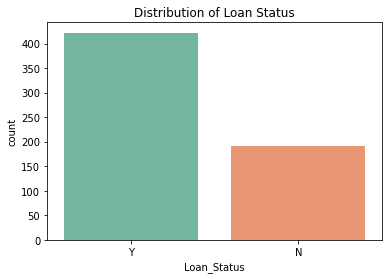

In [24]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=df, palette='Set2')
plt.title('Distribution of Loan Status')
plt.show()

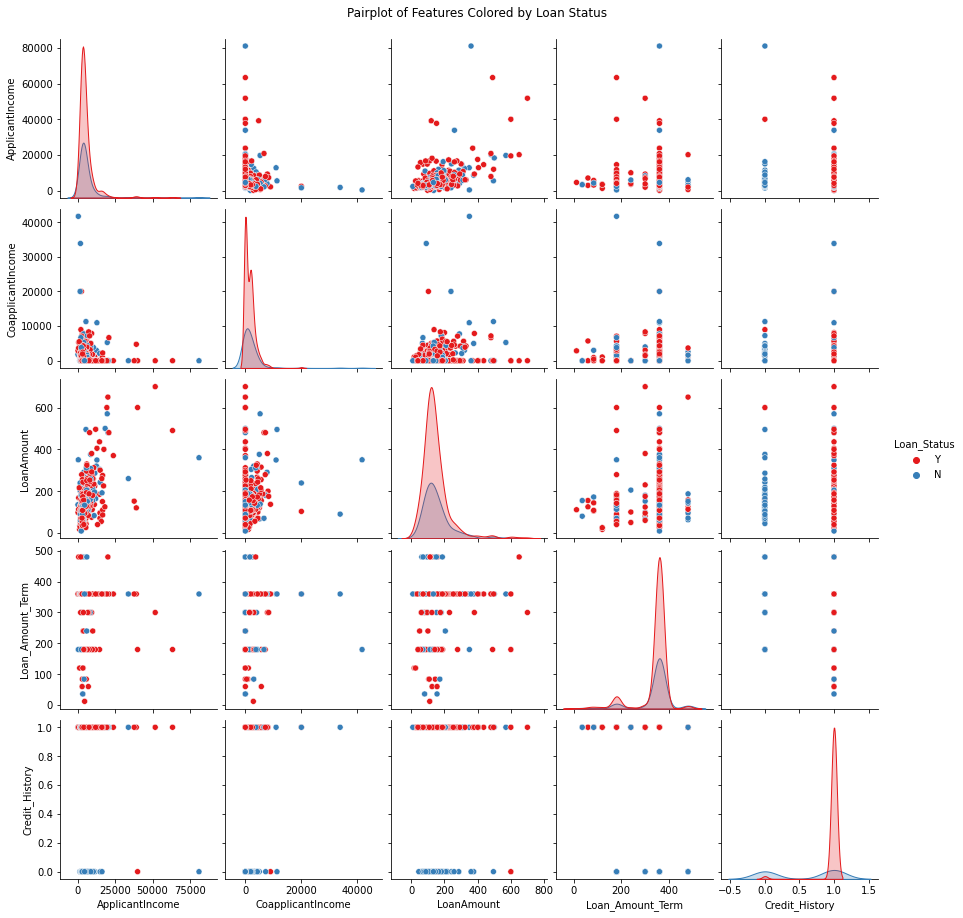

In [25]:
# Visualize the relationship between features using a pairplot
sns.pairplot(df, hue='Loan_Status', palette='Set1', diag_kind='kde')
plt.suptitle('Pairplot of Features Colored by Loan Status', y=1.02)
plt.show()

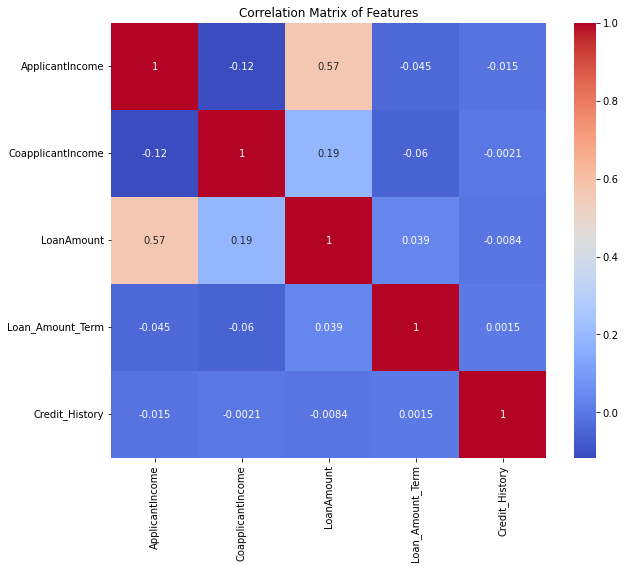

In [26]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Features')
plt.show()

In [27]:
# Data Preprocessing
df.dropna(inplace=True)  # Handling missing values

In [28]:
# Create and fit label encoders for categorical features
encoders = {}
for column in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    encoders[column] = le

In [29]:
# Save encoders for use in the Streamlit app
with open('label_encoders_svm.pkl', 'wb') as file:
    pickle.dump(encoders, file)

In [30]:
# Define features and target variable
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)  # Exclude Loan_ID from features
y = df['Loan_Status']

In [31]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [32]:
# Save the scaler for use in the Streamlit app
with open('scaler_svm.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
# Train a Support Vector Machine (SVM) Classifier
model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [35]:
# Save the model
with open('loan_model_svm.pkl', 'wb') as file:
    pickle.dump(model, file)

In [36]:
# Make predictions and evaluate
y_pred = model.predict(X_test)

In [37]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


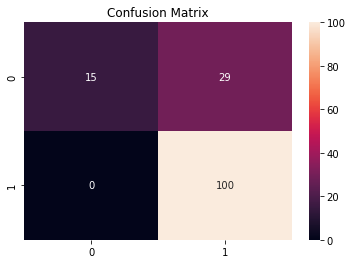

In [38]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()


In [39]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       1.00      0.34      0.51        44
           Y       0.78      1.00      0.87       100

    accuracy                           0.80       144
   macro avg       0.89      0.67      0.69       144
weighted avg       0.84      0.80      0.76       144

